https://datascience.foundation/sciencewhitepaper/understanding-imbalanced-datasets-and-techniques-for-handling-them

https://www.kaggle.com/dskagglemt/handling-imbalance-class

------------

### Import the basic required libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

plt.style.use("fivethirtyeight")
sns.set_style("darkgrid")

In [16]:
LABELS = ["No Claim Filed", "Claim Filed"]

In [3]:
data = pd.read_csv("F:/3.Suresh/1.Material/05.Data Science/22. Data Sets/GitHub/Porto Seguro Safe Driver Prediction.csv")
data.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


In [4]:
data.shape

(595212, 59)

### Target / Class Exploration
- Now let us do some **Target / Class Exploration**, to check if our **target is balanced or not**.

- As we already know that the proportion of records with **target = 1 (Claim Filed)** is far less than **target = 0 (No Claim Filed).**


- This can lead to a model that has great accuracy but does have any added value in practice

In [5]:
data.target.value_counts()

0    573518
1     21694
Name: target, dtype: int64

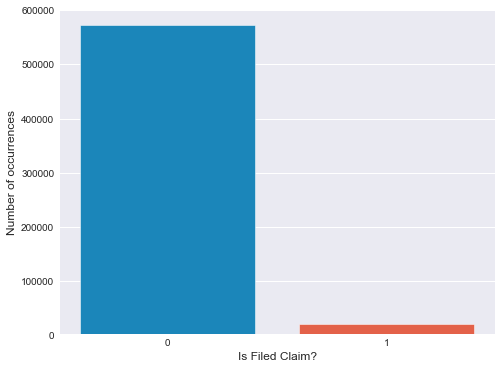

In [14]:
plt.figure(figsize=(7,6))
sns.countplot(data.target);
plt.xlabel('Is Filed Claim?');
plt.ylabel('Number of occurrences');
plt.show()

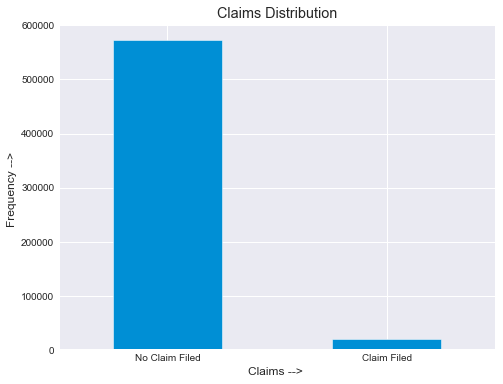

In [18]:
plt.figure(figsize=(7,6))
count_classes = pd.value_counts(data['target'], sort = True)

count_classes.plot(kind = 'bar', rot = 0)

plt.title("Claims Distribution")

plt.xticks(range(2), LABELS)

plt.xlabel("Claims --> ")

plt.ylabel("Frequency --> ")

plt.show()

In [7]:
X = data.drop('target', axis=1)
y = data.target

In [8]:
data.shape, X.shape, y.shape

((595212, 59), (595212, 58), (595212,))

In [9]:
data_table = pd.DataFrame()
data_table['technique'] = ['Original Data']
data_table['X_Shape'] = [X.shape[0]]
data_table['y_shape'] = [y.shape[0]]
data_table['target_0'] = [y.value_counts()[0]]
data_table['target_1'] = [y.value_counts()[1]]
data_table

,technique,X_Shape,y_shape,target_0,target_1
0,Original Data,595212,595212,573518,21694


### 1. Under Sampling Technique

- In this technique as well, we do have various libraries which work with a similar approach.


- Here, we are going to use the NearMiss method to perform under-sampling. NearMiss refers to a collection of under-sampling methods that select examples based on the distance of majority class examples to minority class examples.


- First we will import the library for NearMiss as below, and then create an instance of NearMiss() as nm. And as usual will use the .fit() method. Note that we will have .fit_sample() method. This is used to resample the dataset.

### 1.1 Under Sampling Using NearMiss

In [10]:
from imblearn.under_sampling import NearMiss
nm = NearMiss()
X_us, y_us = nm.fit_sample(X,y)

Using TensorFlow backend.


- Next, we will check the shape of our X and y after re-sampling, which I am saving into a separate data frame so that we can compare both outputs. Feel free to use your own variable name and (or) use the same variable as X and y to have re-sample data after fit_sample().

In [19]:
print('Shape for Imbalanced Class :')
display(X.shape, y.shape)
print('Count of target : {} '.format(y.value_counts()))

print('Shape for Balanced Class :')
display(X_us.shape, y_us.shape)
print('Count of target : {} '.format(y_us.value_counts()))

Shape for Imbalanced Class :


(595212, 58)

(595212,)

Count of target : 0    573518
1     21694
Name: target, dtype: int64 
Shape for Balanced Class :


(43388, 58)

(43388,)

AttributeError: 'numpy.ndarray' object has no attribute 'value_counts'

- If you remember, we already created a data frame as data_table, to capture the different sampling technique and count of Target with each processing.

- So let us check the count after NearMiss().

In [20]:
new_row = {'technique': 'Under Sampling - NearMiss', 'X_Shape': X_us.shape[0], 'y_Shape':y_us.shape[0],
           'target_0': y_us.value_counts()[0], 'target_1' : y_us.value_counts()[1]}
data_table = data_table.append(new_row,ignore_index=True)

data_table

AttributeError: 'numpy.ndarray' object has no attribute 'value_counts'

### 1.2 Under Sampling using RandomUnderSampler
- RandomUnderSampler is a fast and easy way to balance the data by randomly selecting a subset of data for the targeted classes.


- Under-sample the majority class(es) by randomly picking samples with or without replacement.

In [21]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42, replacement=True)  
X_rus, y_rus = rus.fit_resample(X, y)

In [22]:
new_row = {
    'technique': 'Under Sampling - RandomUnderSampler', 
    'X_Shape': X_rus.shape[0], 
    'y_Shape':y_rus.shape[0], 
    'target_0': y_rus.value_counts()[0], 
    'target_1' : y_rus.value_counts()[1]
}

data_table = data_table.append(new_row,ignore_index=True)

data_table

AttributeError: 'numpy.ndarray' object has no attribute 'value_counts'

### 2: Over Sampling
- One way to fight imbalance data is to generate new samples in the minority classes. The most naive strategy is to generate new samples by randomly sampling with replacement of the currently available samples. The RandomOverSampler offers such a scheme.

In [23]:
from imblearn.over_sampling import RandomOverSampler
os = RandomOverSampler() # Default sampling_strategy='auto'
X_os, y_os = os.fit_sample(X, y)

In [24]:
new_row = {
    'technique': 'Over Sampling - Auto', 
    'X_Shape': X_os.shape[0], 
    'y_Shape':y_os.shape[0], 
    'target_0': y_os.value_counts()[0], 
    'target_1' : y_os.value_counts()[1]
}
data_table = data_table.append(new_row,ignore_index=True)

data_table

AttributeError: 'numpy.ndarray' object has no attribute 'value_counts'

In [25]:
os2 = RandomOverSampler(sampling_strategy=0.5)

X_os2, y_os2 = os2.fit_sample(X, y)

In [26]:
new_row = {
    'technique': 'Over Sampling - half', 
    'X_Shape': X_os2.shape[0], 
    'y_Shape':y_os2.shape[0], 
    'target_0': y_os2.value_counts()[0], 
    'target_1' : y_os2.value_counts()[1]
}
data_table = data_table.append(new_row,ignore_index=True)

data_table

AttributeError: 'numpy.ndarray' object has no attribute 'value_counts'

### 3: SMOTE
- SMOTE (Synthetic Minority Oversampling TEchnique) consists of synthesizing elements for the minority class, based on those that already exist. It works randomly picingk a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors.


- This technique generates synthetic data for the minority class.

https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.over_sampling.SMOTE.html

In [27]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy = 'minority')
X_smote, y_smote = smote.fit_sample(X, y)

In [28]:
new_row = {
    'technique': 'SMOTE - minority', 
    'X_Shape': X_smote.shape[0], 
    'y_Shape':y_smote.shape[0], 
    'target_0': y_smote.value_counts()[0], 
    'target_1' : y_smote.value_counts()[1]
}
data_table = data_table.append(new_row,ignore_index=True)

data_table

AttributeError: 'numpy.ndarray' object has no attribute 'value_counts'

- There are various other parameters such as random_state, k_neighbors etc which can be changed as well.

### 4: SMOTETomek
- Its a combination of over-sampling and under-sampling, using the SMOTE and Tomek links techniques.

In [29]:
from imblearn.combine import SMOTETomek
smk = SMOTETomek(random_state=9)
X_smk, y_smk = smk.fit_sample(X, y)

In [30]:
new_row = {
    'technique': 'SMOTETomek_9', 
    'X_Shape': X_smk.shape[0], 
    'y_Shape':y_smk.shape[0], 
    'target_0': y_smk.value_counts()[0], 
    'target_1' : y_smk.value_counts()[1]
}
data_table = data_table.append(new_row,ignore_index=True)

data_table

AttributeError: 'numpy.ndarray' object has no attribute 'value_counts'

- **Note:** One can select any of the technique based on the problem, but make sure to use proper and correct evulation metrix.

Dont go with accuracy; score.

Some of the metrics, which might works best with such imbalanced dataset are as below. Try considering them.

 1. Confusion Matrix
 2. Precision
 3. Recall
 4. F1-Score
 5. AUC-ROC Curve